# Árboles de decisión y bosques aleatorios en Python

## Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtener los datos

In [2]:
df = pd.read_csv('breast_cancer.csv')

In [3]:
df.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Análisis exploratorio de datos

Simplemente lo revisaremos con un pairplot simple para este pequeño conjunto de datos.

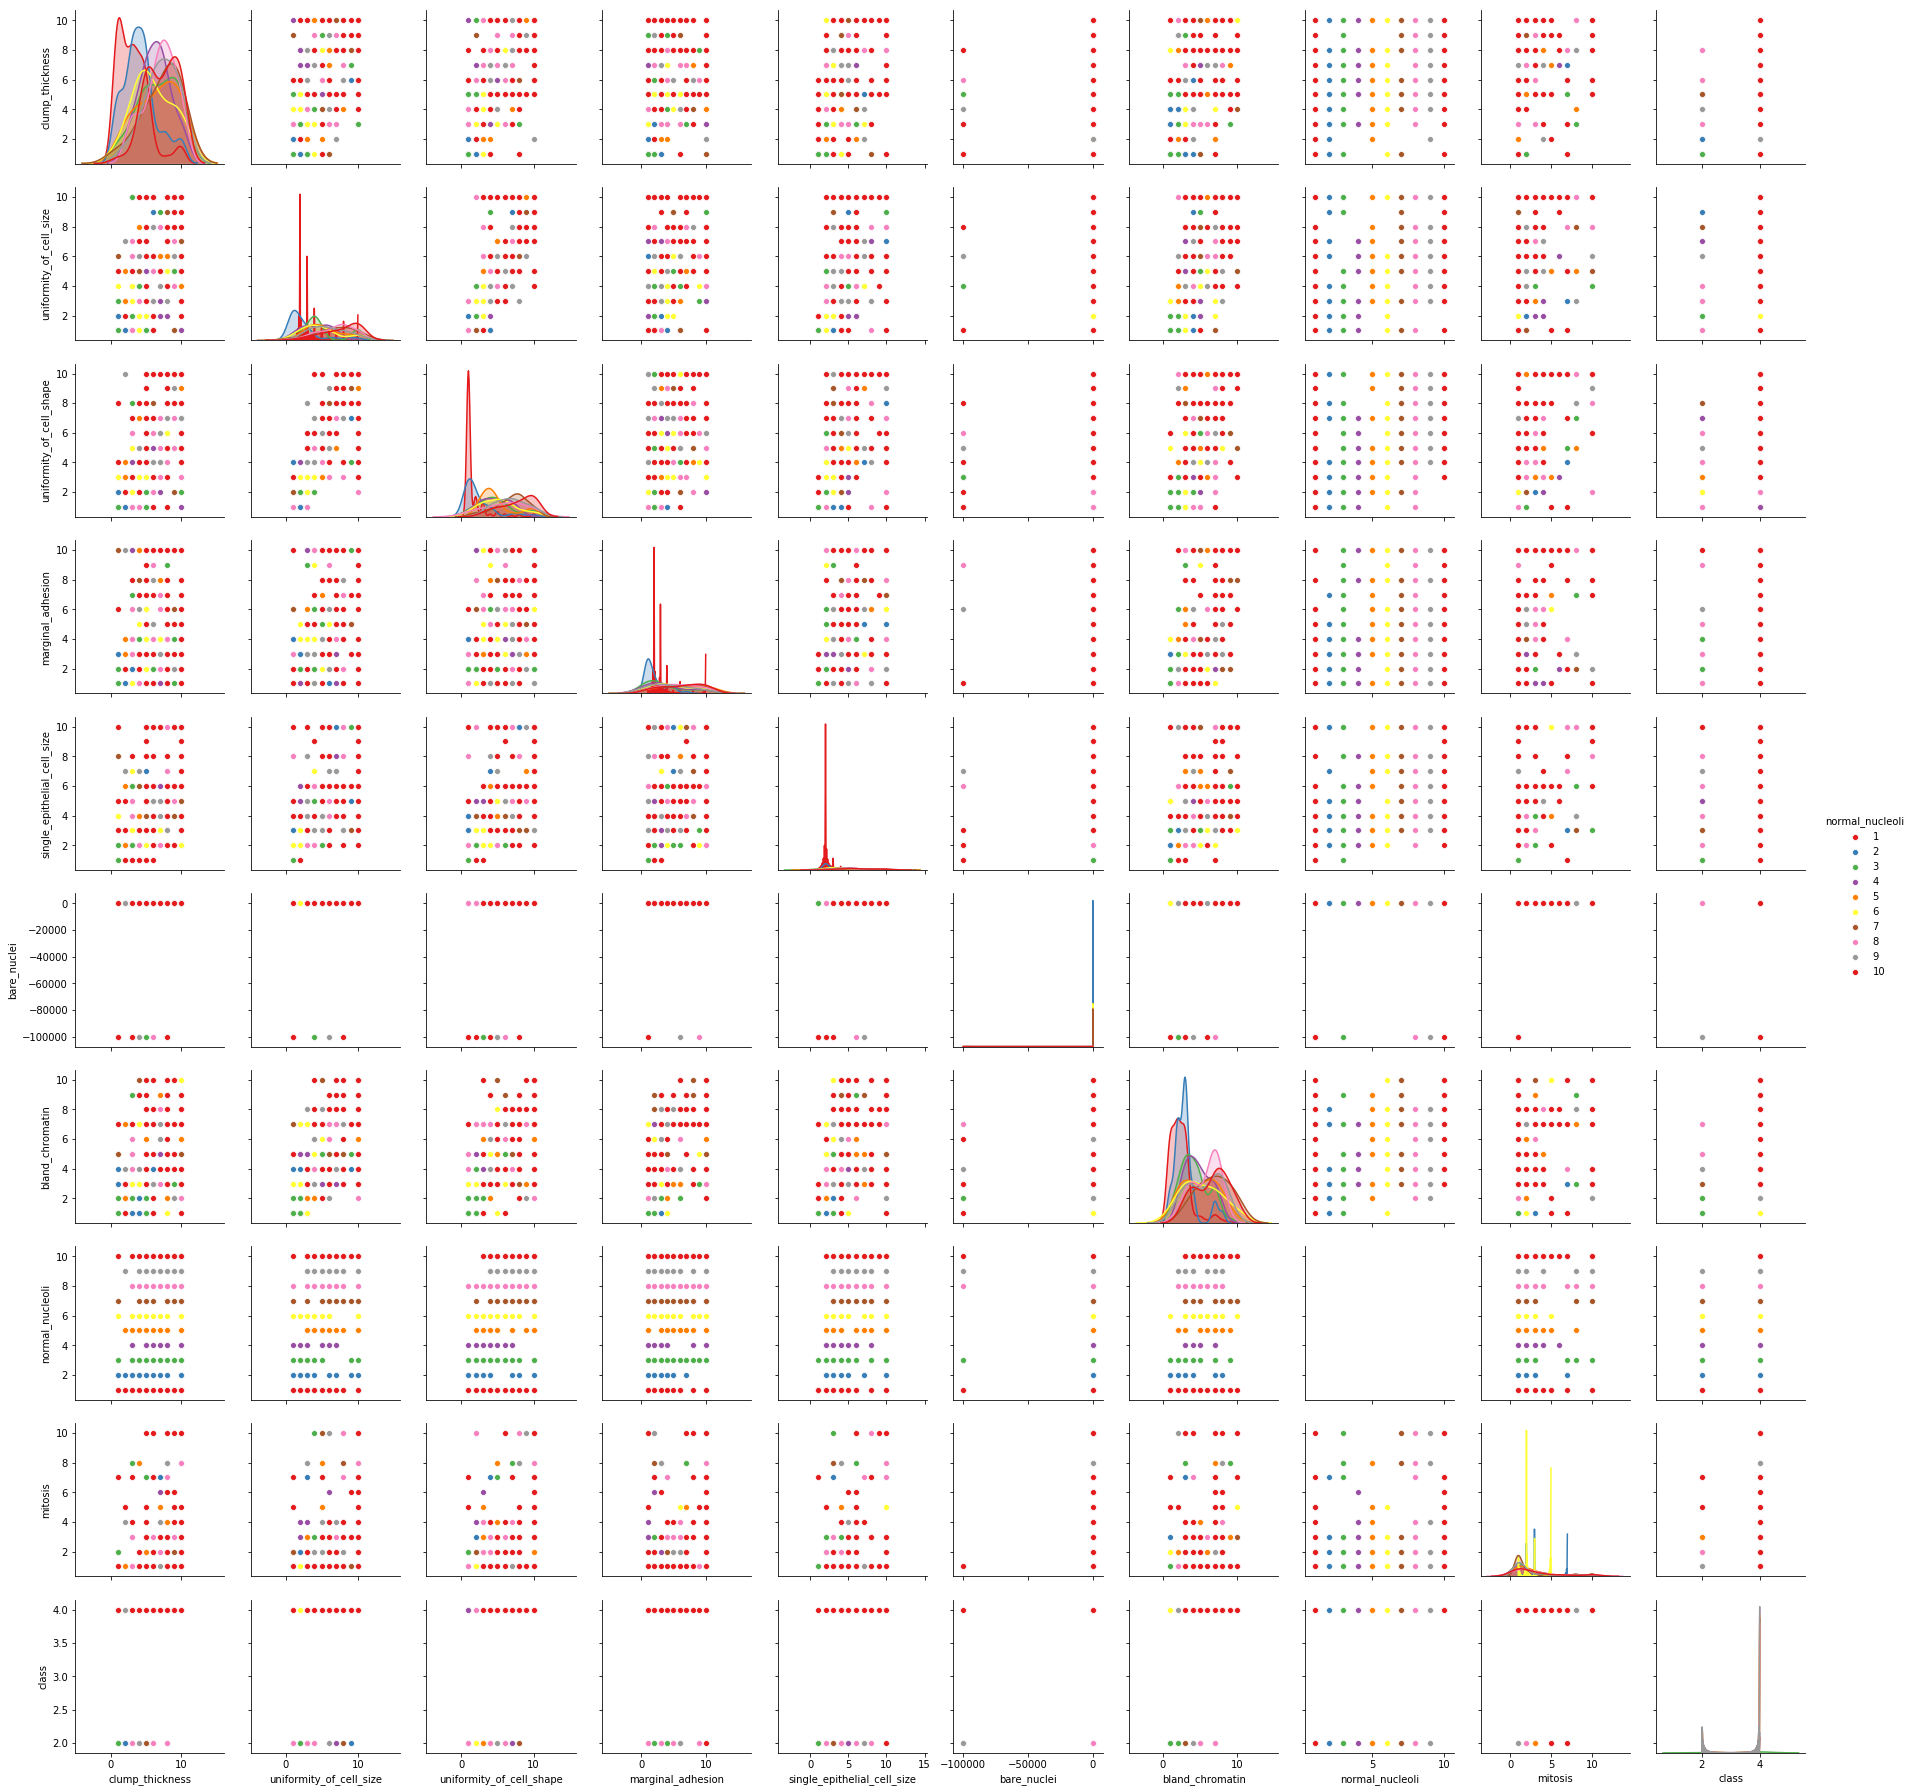

In [7]:
sns.pairplot(df,hue='normal_nucleoli',palette='Set1')

## División en Conjunto de entrenamiento y de prueba

¡Dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba!

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('uniformity_of_cell_shape',axis=1)
y = df['uniformity_of_cell_shape']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

## Árboles de decisión

Comenzaremos simplemente entrenando un solo árbol de decisión.

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=101)

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

## Predicción y Evaluación¶
Evaluemos nuestro árbol de decisiones.

In [15]:
predictions = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.85      0.99      0.92        83
           2       0.40      0.14      0.21        14
           3       0.25      0.19      0.21        16
           4       0.31      0.36      0.33        11
           5       0.17      0.22      0.19         9
           6       0.29      0.29      0.29         7
           7       0.00      0.00      0.00        10
           8       0.14      0.12      0.13         8
           9       0.00      0.00      0.00         1
          10       0.53      0.67      0.59        12

   micro avg       0.61      0.61      0.61       171
   macro avg       0.29      0.30      0.29       171
weighted avg       0.56      0.61      0.57       171



In [18]:
print(confusion_matrix(y_test,predictions))

[[82  0  0  0  0  1  0  0  0  0]
 [ 7  2  2  1  2  0  0  0  0  0]
 [ 7  0  3  1  3  1  0  1  0  0]
 [ 0  2  1  4  2  1  0  0  0  1]
 [ 0  0  4  1  2  1  0  0  0  1]
 [ 0  0  0  1  2  2  1  0  0  1]
 [ 0  1  1  3  0  0  0  2  1  2]
 [ 0  0  1  1  1  1  1  1  0  2]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0  3  0  8]]


## Visualización de árbol

Scikit learn en realidad tiene algunas capacidades de visualización incorporadas para los árboles de decisión, no las usará con frecuencia y requiere que instale la biblioteca pydot, aquí hay un ejemplo de cómo se ve y el código para ejecutarlo:

In [20]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['uniformity_of_cell_size',
 'uniformity_of_cell_shape',
 'marginal_adhesion',
 'single_epithelial_cell_size',
 'bare_nuclei',
 'bland_chromatin',
 'normal_nucleoli',
 'mitosis',
 'class']

In [24]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
print(os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/')

:C:/Program Files (x86)/Graphviz2.38/bin/


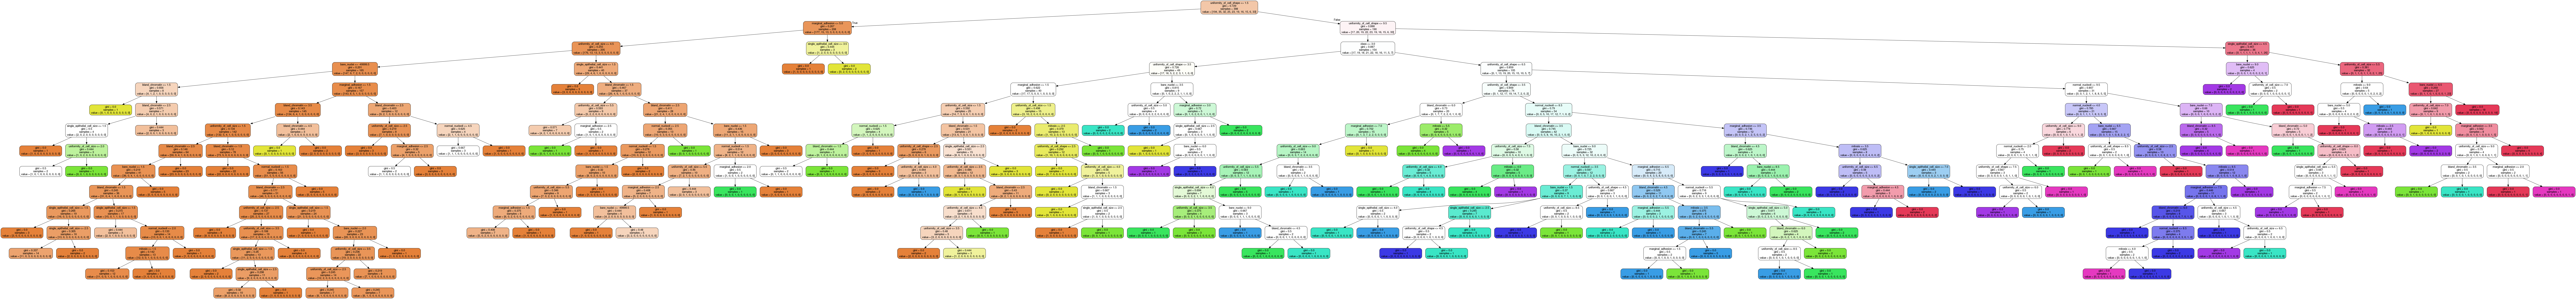

In [26]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())